# Sensor failure Detection and prediction


## Initialize Imports and mount the dataset

In [75]:
import pandas as pd
import numpy as np

# plotting
import seaborn as sns
import matplotlib.pyplot as plt 




# Data pre/processing and modeling
import itertools
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

RANDNUM = 101
DataSet = 'sensor.csv'
# DataSet = '/content/SensorFailurePrediction/sensor-fault-detection.csv'

## Create Dataframe


In [76]:
df = pd.read_csv(DataSet, sep=',')
df.dataframename = 'sensor.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')
df.shape

There are 220320 rows and 55 columns


(220320, 55)

In [77]:
df.head(5)
df.drop(['Unnamed: 0','sensor_00','sensor_15','sensor_50','sensor_51'],axis=1, inplace=True)

In [78]:
tempColNames = """SENSOR_00 - Motor Casing Vibration
SENSOR_01 - Motor Frequency A
SENSOR_02 - Motor Frequency B
SENSOR_03 - Motor Frequency C
SENSOR_04 - Motor Speed
SENSOR_05 - Motor Current
SENSOR_06 - Motor Active Power
SENSOR_07 - Motor Apparent Power
SENSOR_08 - Motor Reactive Power
SENSOR_09 - Motor Shaft Power  
SENSOR_10 - Motor Phase Current A
SENSOR_11 - Motor Phase Current B
SENSOR_12 - Motor Phase Current C
SENSOR_13 - Motor Coupling Vibration
SENSOR_14 - Motor Phase Voltage AB
SENSOR_16 - Motor Phase Voltage BC
SENSOR_17 - Motor Phase Voltage CA
SENSOR_18 - Pump Casing Vibration
SENSOR_19 - Pump Stage 1 Impeller Speed
SENSOR_20 - Pump Stage 1 Impeller Speed
SENSOR_21 - Pump Stage 1 Impeller Speed
SENSOR_22 - Pump Stage 1 Impeller Speed
SENSOR_23 - Pump Stage 1 Impeller Speed
SENSOR_24 - Pump Stage 1 Impeller Speed
SENSOR_25 - Pump Stage 2 Impeller Speed
SENSOR_26 - Pump Stage 2 Impeller Speed
SENSOR_27 - Pump Stage 2 Impeller Speed
SENSOR_28 - Pump Stage 2 Impeller Speed
SENSOR_29 - Pump Stage 2 Impeller Speed
SENSOR_30 - Pump Stage 2 Impeller Speed
SENSOR_31 - Pump Stage 2 Impeller Speed
SENSOR_32 - Pump Stage 2 Impeller Speed
SENSOR_33 - Pump Stage 2 Impeller Speed
SENSOR_34 - Pump Inlet Flow
SENSOR_35 - Pump Discharge Flow
SENSOR_36 - Pump UNKNOWN
SENSOR_37 - Pump Lube Oil Overhead Reservoir Level
SENSOR_38 - Pump Lube Oil Return Temp
SENSOR_39 - Pump Lube Oil Supply Temp
SENSOR_40 - Pump Thrust Bearing Active Temp
SENSOR_41 - Motor Non Drive End Radial Bearing Temp 1
SENSOR_42 - Motor Non Drive End Radial Bearing Temp 2
SENSOR_43 - Pump Thrust Bearing Inactive Temp
SENSOR_44 - Pump Drive End Radial Bearing Temp 1
SENSOR_45 - Pump non Drive End Radial Bearing Temp 1
SENSOR_46 - Pump Non Drive End Radial Bearing Temp 2
SENSOR_47 - Pump Drive End Radial Bearing Temp 2
SENSOR_48 - Pump Inlet Pressure
SENSOR_49 - Pump Temp Unknown
SENSOR_50 - Pump Discharge Pressure 1
SENSOR_51 - Pump Discharge Pressure 2"""




tempD = {}

colArr = tempColNames.splitlines()

for i in colArr:
    splitStr = i.split(' - ')
    tempD[splitStr[0].lower()] = i


real_cols = df.columns.values

for i in range(len(real_cols)):
    if 'sensor' in real_cols[i]:
        real_cols[i] = tempD[real_cols[i]]
       


        



Inspect our data

In [79]:
df.head(5)

timestamp  SENSOR_01 - Motor Frequency A  \
0  2018-04-01 00:00:00                       47.09201   
1  2018-04-01 00:01:00                       47.09201   
2  2018-04-01 00:02:00                       47.35243   
3  2018-04-01 00:03:00                       47.09201   
4  2018-04-01 00:04:00                       47.13541   

   SENSOR_02 - Motor Frequency B  SENSOR_03 - Motor Frequency C  \
0                        53.2118                      46.310760   
1                        53.2118                      46.310760   
2                        53.2118                      46.397570   
3                        53.1684                      46.397568   
4                        53.2118                      46.397568   

   SENSOR_04 - Motor Speed  SENSOR_05 - Motor Current  \
0                 634.3750                   76.45975   
1                 634.3750                   76.45975   
2                 638.8889                   73.54598   
3                 628.1250                   76.98898   
4                 636.4583                   76.58897   

   SENSOR_06 - Motor Active Power  SENSOR_07 - Motor Apparent Power  \
0                        13.41146                          16.13136   
1                        13.41146                          16.13136   
2                        13.32465                          16.03733   
3                        13.31742                          16.24711   
4                        13.35359                          16.21094   

   SENSOR_08 - Motor Reactive Power  SENSOR_09 - Motor Shaft Power    ...  \
0                          15.56713                         15.05353  ...   
1                          15.56713                         15.05353  ...   
2                          15.61777                         15.01013  ...   
3                          15.69734                         15.08247  ...   
4                          15.69734                         15.08247  ...   

   SENSOR_41 - Motor Non Drive End Radial Bearing Temp 1  \
0                                           30.98958       
1                                           30.98958       
2                                           30.46875       
3                                           30.46875       
4                                           30.98958       

   SENSOR_42 - Motor Non Drive End Radial Bearing Temp 2  \
0                                          31.770832       
1                                          31.770832       
2                                          31.770830       
3                                          31.510420       
4                                          31.510420       

   SENSOR_43 - Pump Thrust Bearing Inactive Temp  \
0                                       41.92708   
1                                       41.92708   
2                                       41.66666   
3                                       40.88541   
4                                       41.40625   

   SENSOR_44 - Pump Drive End Radial Bearing Temp 1  \
0                                         39.641200   
1                                         39.641200   
2                                         39.351852   
3                                         39.062500   
4                                         38.773150   

   SENSOR_45 - Pump non Drive End Radial Bearing Temp 1  \
0                                           65.68287      
1                                           65.68287      
2                                           65.39352      
3                                           64.81481      
4                                           65.10416      

   SENSOR_46 - Pump Non Drive End Radial Bearing Temp 2  \
0                                           50.92593      
1                                           50.92593      
2                                           51.21528      
3                                           51.21528      
4                 

In [80]:
df['machine_status'].unique()

array(['NORMAL', 'BROKEN', 'RECOVERING'], dtype=object)

Get some statistics about our data

In [81]:
df.describe().transpose()

count        mean  \
SENSOR_01 - Motor Frequency A                       219951.0   47.591611   
SENSOR_02 - Motor Frequency B                       220301.0   50.867392   
SENSOR_03 - Motor Frequency C                       220301.0   43.752481   
SENSOR_04 - Motor Speed                             220301.0  590.673936   
SENSOR_05 - Motor Current                           220301.0   73.396414   
SENSOR_06 - Motor Active Power                      215522.0   13.501537   
SENSOR_07 - Motor Apparent Power                    214869.0   15.843152   
SENSOR_08 - Motor Reactive Power                    215213.0   15.200721   
SENSOR_09 - Motor Shaft Power                       215725.0   14.799210   
SENSOR_10 - Motor Phase Current A                   220301.0   41.470339   
SENSOR_11 - Motor Phase Current B                   220301.0   41.918319   
SENSOR_12 - Motor Phase Current C                   220301.0   29.136975   
SENSOR_13 - Motor Coupling Vibration                220301.0    7.078858   
SENSOR_14 - Motor Phase Voltage AB                  220299.0  376.860041   
SENSOR_16 - Motor Phase Voltage BC                  220289.0  416.472892   
SENSOR_17 - Motor Phase Voltage CA                  220274.0  421.127517   
SENSOR_18 - Pump Casing Vibration                   220274.0    2.303785   
SENSOR_19 - Pump Stage 1 Impeller Speed             220304.0  590.829775   
SENSOR_20 - Pump Stage 1 Impeller Speed             220304.0  360.805165   
SENSOR_21 - Pump Stage 1 Impeller Speed             220304.0  796.225942   
SENSOR_22 - Pump Stage 1 Impeller Speed             220279.0  459.792815   
SENSOR_23 - Pump Stage 1 Impeller Speed             220304.0  922.609264   
SENSOR_24 - Pump Stage 1 Impeller Speed             220304.0  556.235397   
SENSOR_25 - Pump Stage 2 Impeller Speed             220284.0  649.144799   
SENSOR_26 - Pump Stage 2 Impeller Speed             220300.0  786.411781   
SENSOR_27 - Pump Stage 2 Impeller Speed             220304.0  501.506589   
SENSOR_28 - Pump Stage 2 Impeller Speed             220304.0  851.690339   
SENSOR_29 - Pump Stage 2 Impeller Speed             220248.0  576.195305   
SENSOR_30 - Pump Stage 2 Impeller Speed             220059.0  614.596442   
SENSOR_31 - Pump Stage 2 Impeller Speed             220304.0  863.323100   
SENSOR_32 - Pump Stage 2 Impeller Speed             220252.0  804.283915   
SENSOR_33 - Pump Stage 2 Impeller Speed             220304.0  486.405980   
SENSOR_34 - Pump Inlet Flow                         220304.0  234.971776   
SENSOR_35 - Pump Discharge Flow                     220304.0  427.129817   
SENSOR_36 - Pump UNKNOWN                            220304.0  593.033876   
SENSOR_37 - Pump Lube Oil Overhead Reservoir Level  220304.0   60.787360   
SENSOR_38 - Pump Lube Oil Return Temp               220293.0   49.655946   
SENSOR_39 - Pump Lube Oil Supply Temp               220293.0   36.610444   
SENSOR_40 - Pump Thrust Bearing Active Temp         220293.0   68.844530   
SENSOR_41 - Motor Non Drive End Radial Bearing ...  220293.0   35.365126   
SENSOR_42 - Motor Non Drive End Radial Bearing ...  220293.0   35.453455   
SENSOR_43 - Pump Thrust Bearing Inactive Temp       220293.0   43.879591   
SENSOR_44 - Pump Drive End Radial Bearing Temp 1    220293.0   42.656877   
SENSOR_45 - Pump non Drive End Radial Bearing T...  220293.0   43.094984   
SENSOR_46 - Pump Non Drive End Radial Bearing T...  220293.0   48.018585   
SENSOR_47 - Pump Drive End Radial Bearing Temp 2    220293.0   44.340903   
SENSOR_48 - Pump Inlet Pressure                     220293.0  150.889044   
SENSOR_49 - Pump Temp Unknown                       220293.0   57.119968   

                                                           std        min  \
SENSOR_01 - Motor Frequency A                         3.296666   0.000000   
SENSOR_02 - Motor Frequency B                         3.666820  33.159720   
SENSOR_03 - Motor Frequency C                         2.418887  31.640620   
SENSOR_04 - Motor Spee

In [82]:
# Collect more import info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 50 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   timestamp                                              220320 non-null  object 
 1   SENSOR_01 - Motor Frequency A                          219951 non-null  float64
 2   SENSOR_02 - Motor Frequency B                          220301 non-null  float64
 3   SENSOR_03 - Motor Frequency C                          220301 non-null  float64
 4   SENSOR_04 - Motor Speed                                220301 non-null  float64
 5   SENSOR_05 - Motor Current                              220301 non-null  float64
 6   SENSOR_06 - Motor Active Power                         215522 non-null  float64
 7   SENSOR_07 - Motor Apparent Power                       214869 non-null  float64
 8   SENSOR_08 - Motor Reactive Power  

## Getting some understanding of our data and minor corrections 

We see from the output above, we have some null values in the set, let's check missing values for each column

In [83]:
df.isnull().sum(axis=1)
df.isnull().sum(axis=0)

timestamp                                                   0
SENSOR_01 - Motor Frequency A                             369
SENSOR_02 - Motor Frequency B                              19
SENSOR_03 - Motor Frequency C                              19
SENSOR_04 - Motor Speed                                    19
SENSOR_05 - Motor Current                                  19
SENSOR_06 - Motor Active Power                           4798
SENSOR_07 - Motor Apparent Power                         5451
SENSOR_08 - Motor Reactive Power                         5107
SENSOR_09 - Motor Shaft Power                            4595
SENSOR_10 - Motor Phase Current A                          19
SENSOR_11 - Motor Phase Current B                          19
SENSOR_12 - Motor Phase Current C                          19
SENSOR_13 - Motor Coupling Vibration                       19
SENSOR_14 - Motor Phase Voltage AB                         21
SENSOR_16 - Motor Phase Voltage BC                         31
SENSOR_1

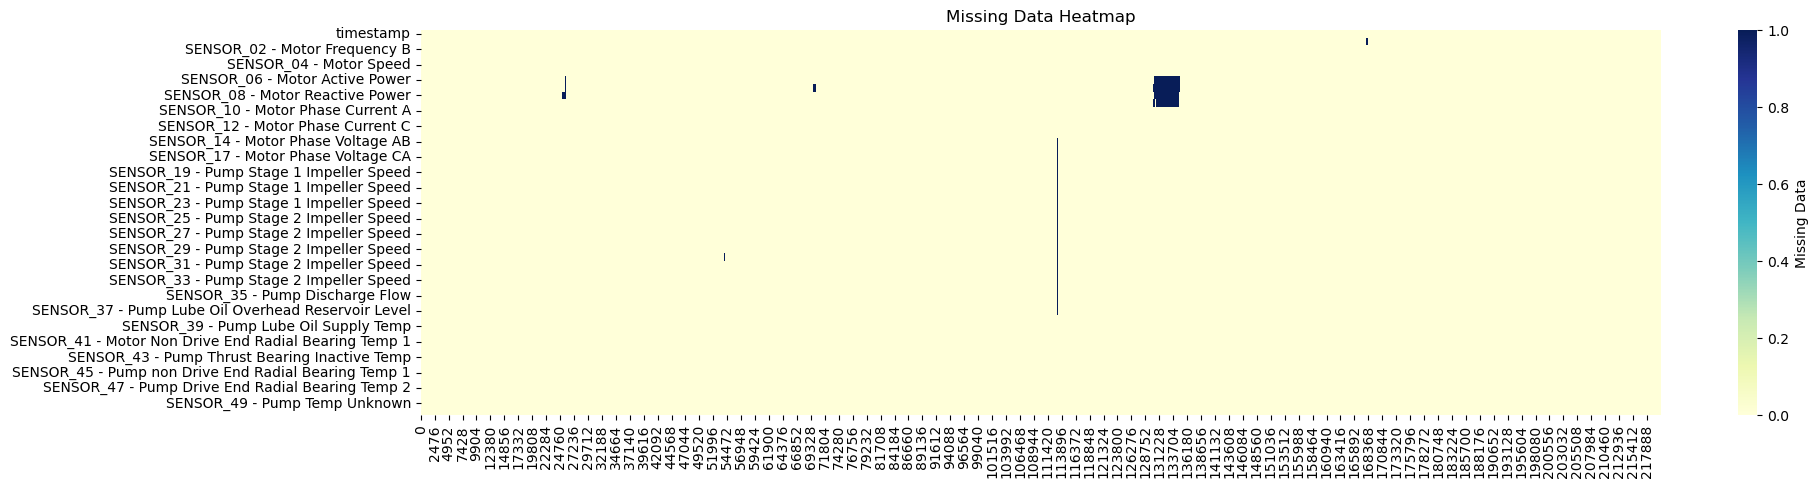

In [84]:
# Check the lost Data Locations via a heat map
plt.figure(figsize=(20,5))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.title('Missing Data Heatmap')
plt.show();

From this plot we are already able to detect some regions in which the row's are missing data, from here we can better visualize these areas

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

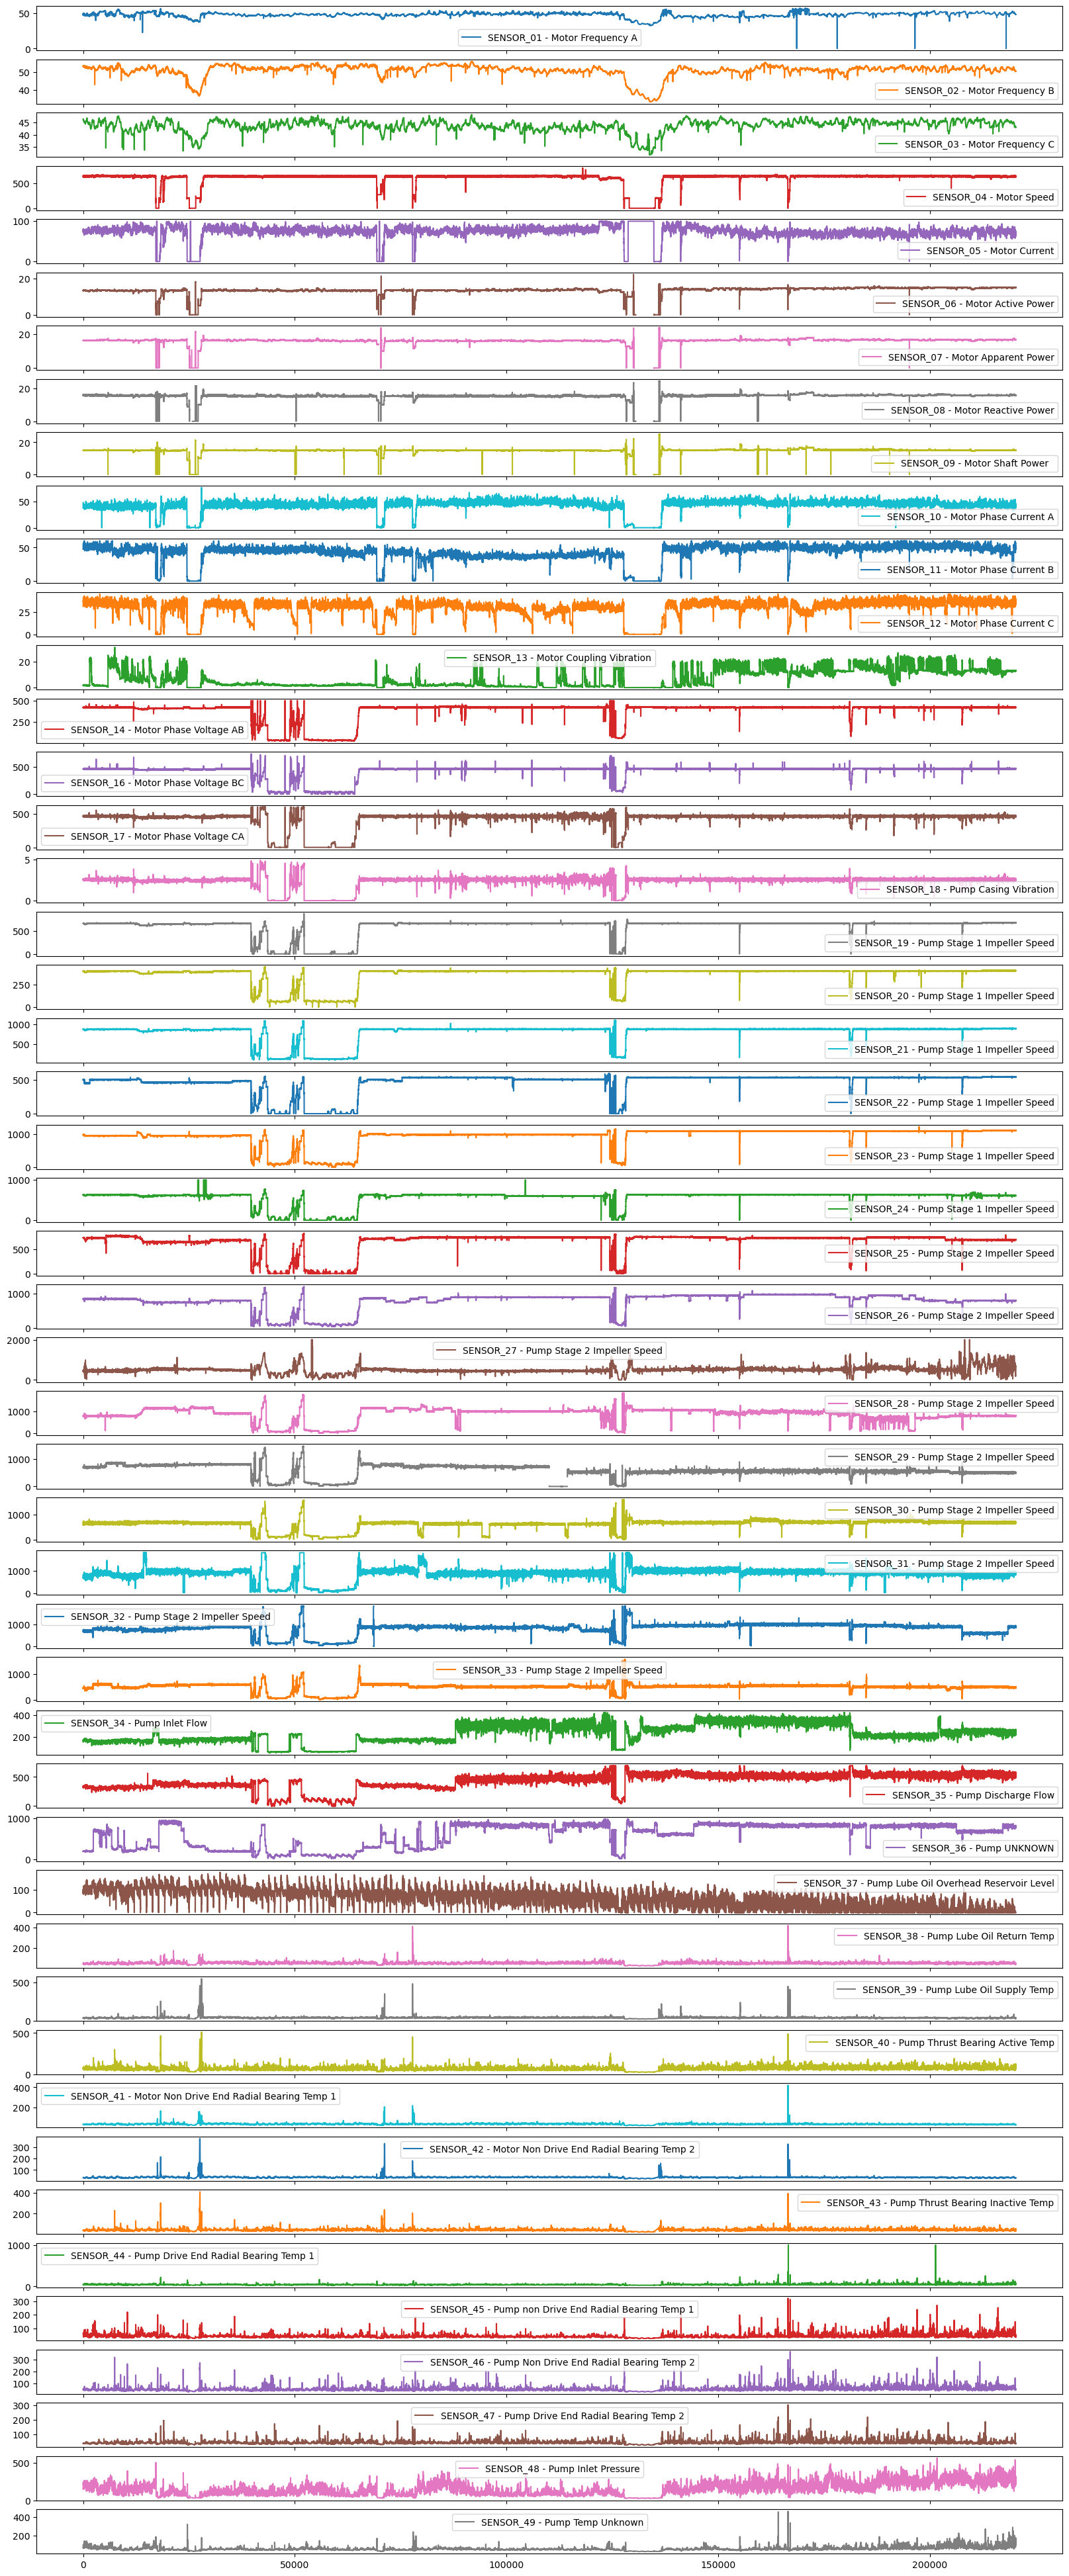

In [85]:
df.plot(subplots =True, sharex = True, figsize = (20,50))

In [86]:
# Collect num of guarenteed breaks in the system we 
df['machine_status'].value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

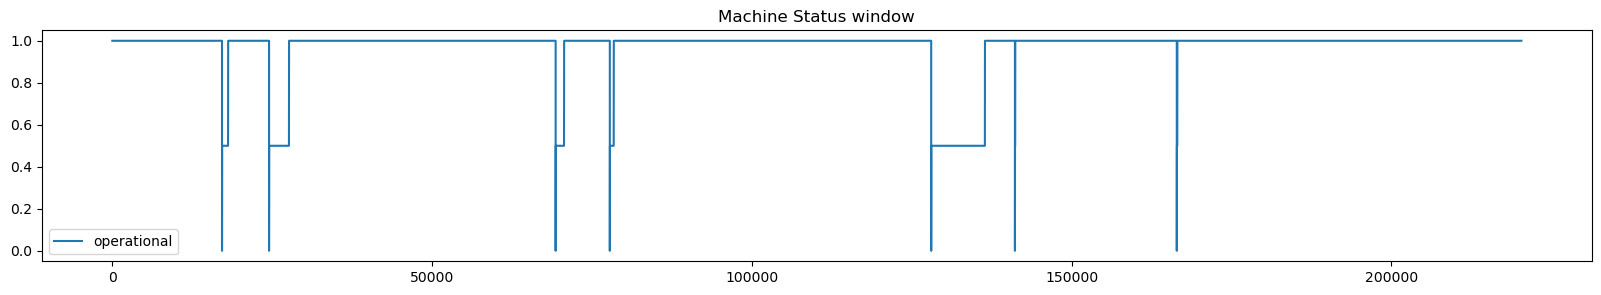

In [87]:
# create operational graph
conditions = [(df['machine_status'] == 'NORMAL'), (df['machine_status'] == 'RECOVERING'), (df['machine_status'] == 'BROKEN')]
choices = [1,0.5,0]
df['operational']  = np.select(condlist=conditions, choicelist=choices)
ax = df['operational'].plot(title='Machine Status window', legend=True, figsize=(20,3), )


In [88]:
# Seeing that we have 7 total breaks we can split this 60/40 leaving at least 2 system breaks in our test data to see if we are correctly prediciting
from sklearn.model_selection import train_test_split

last_40percent = round(len(df) - len(df)*.4)
train = df.iloc[ :last_40percent, :]
test = df.iloc[last_40percent: ,:]

In [89]:
# Verifying our Test data includes two BROKEN samples
test[test['machine_status']=='BROKEN']

timestamp  SENSOR_01 - Motor Frequency A  \
141131  2018-07-08 00:11:00                      45.138890   
166440  2018-07-25 14:00:00                      45.833332   

        SENSOR_02 - Motor Frequency B  SENSOR_03 - Motor Frequency C  \
141131                       52.90799                       45.35590   
166440                       52.99479                       43.88021   

        SENSOR_04 - Motor Speed  SENSOR_05 - Motor Current  \
141131               500.000000                    1.40131   
166440               420.503448                   72.52040   

        SENSOR_06 - Motor Active Power  SENSOR_07 - Motor Apparent Power  \
141131                        0.028935                          0.036169   
166440                       14.185470                         16.247110   

        SENSOR_08 - Motor Reactive Power  SENSOR_09 - Motor Shaft Power    \
141131                          0.036169                         0.007234   
166440                         15.697340                        15.053530   

        ...  SENSOR_42 - Motor Non Drive End Radial Bearing Temp 2  \
141131  ...                                           32.81250       
166440  ...                                           36.45833       

        SENSOR_43 - Pump Thrust Bearing Inactive Temp  \
141131                                       36.19791   
166440                                       51.30208   

        SENSOR_44 - Pump Drive End Radial Bearing Temp 1  \
141131                                          37.32639   
166440                                          52.10200   

        SENSOR_45 - Pump non Drive End Radial Bearing Temp 1  \
141131                                           35.30093      
166440                                           52.66204      

        SENSOR_46 - Pump Non Drive End Radial Bearing Temp 2  \
141131                                           38.19444      
166440                                           67.12963      

        SENSOR_47 - Pump Drive End Radial Bearing Temp 2  \
141131                                          43.40278   
166440                                          43.98148   

        SENSOR_48 - Pump Inlet Pressure  SENSOR_49 - Pump Temp Unknown  \
141131                         99.53703                       44.84954   
166440                        230.32410                       69.73380   

        machine_status  operational  
141131          BROKEN          0.0  
166440          BROKEN          0.0  

[2 rows x 51 columns]

### More Visualization

In [90]:
# get useful columns and rows
sensor_cols = train.iloc[:,1:]
broken_rows = train[train['machine_status']=='BROKEN']
recovery_rows = train[train['machine_status']=='RECOVERING']
normal_rows = train[train['machine_status']=='NORMAL']
machine_status_col = train['machine_status']

/var/folders/b9/vxww42z578b0bb9jx8l2m_1c0000gn/T/ipykernel_5439/179316329.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plot = plt.figure(figsize=(22,1))


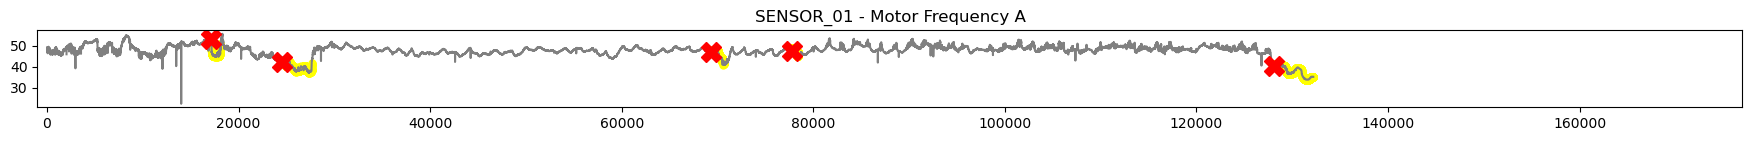

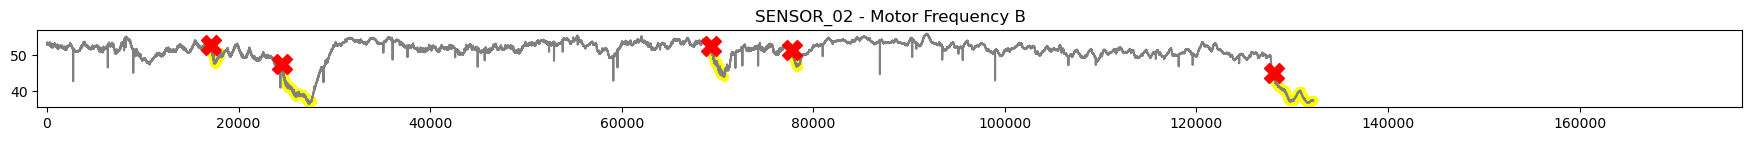

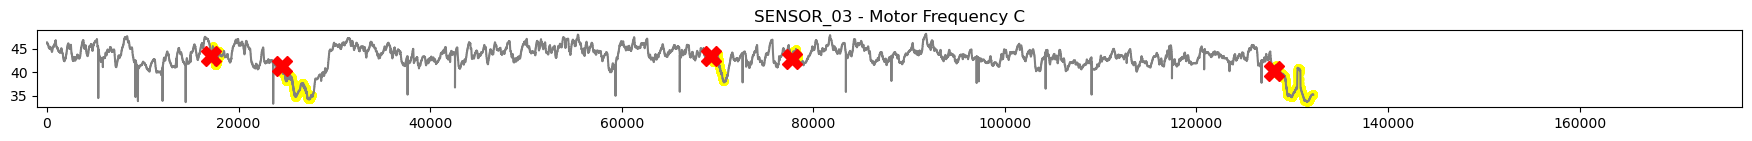

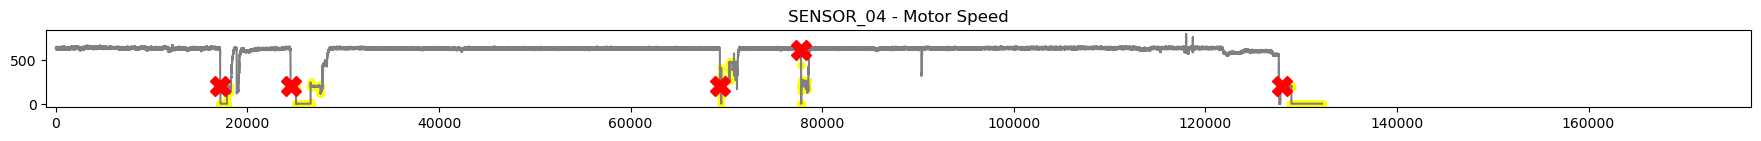

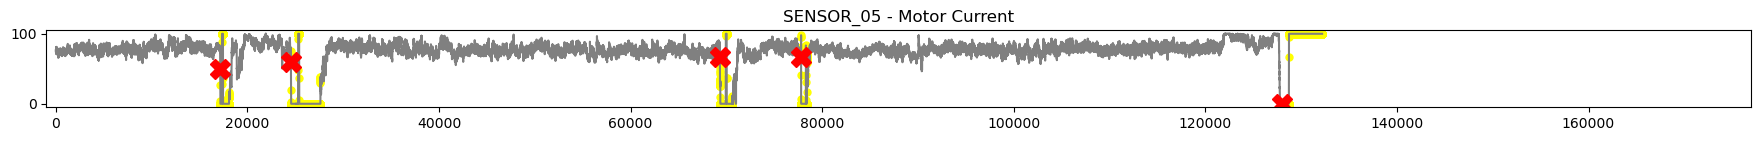

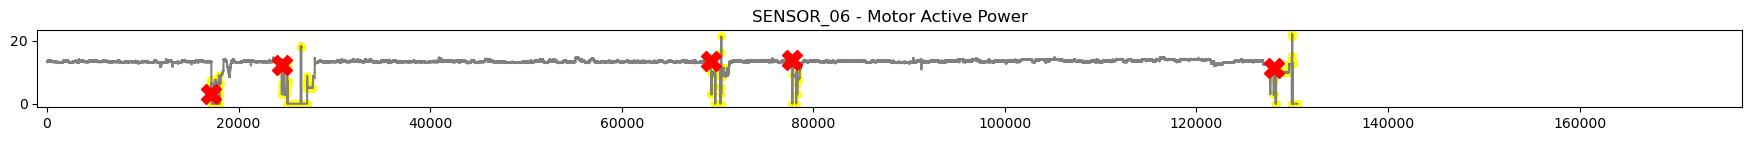

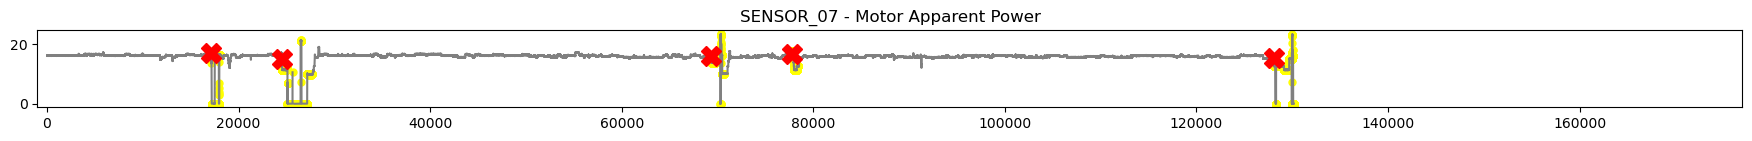

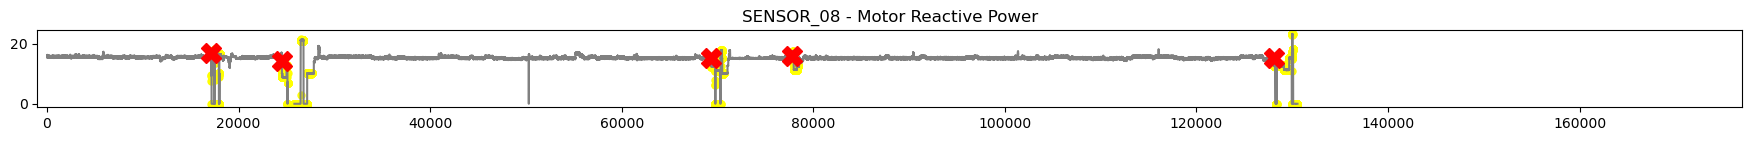

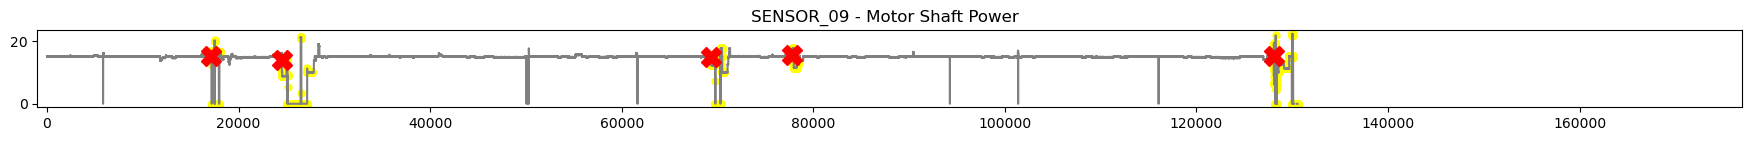

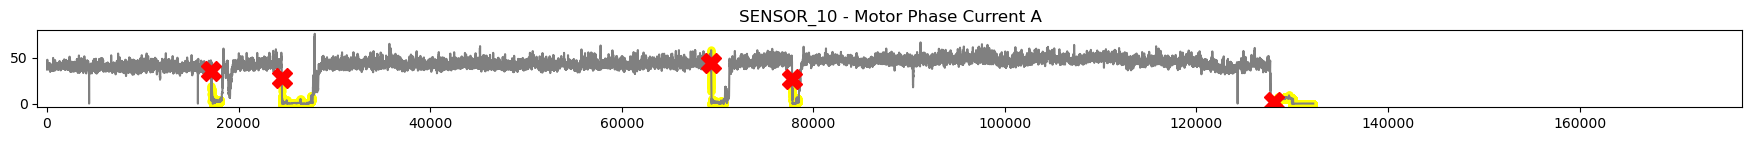

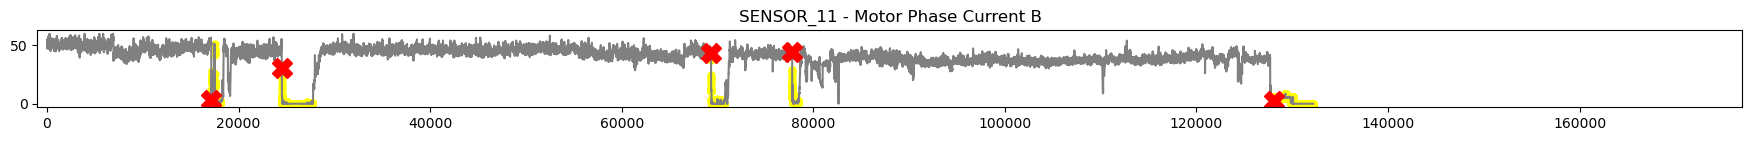

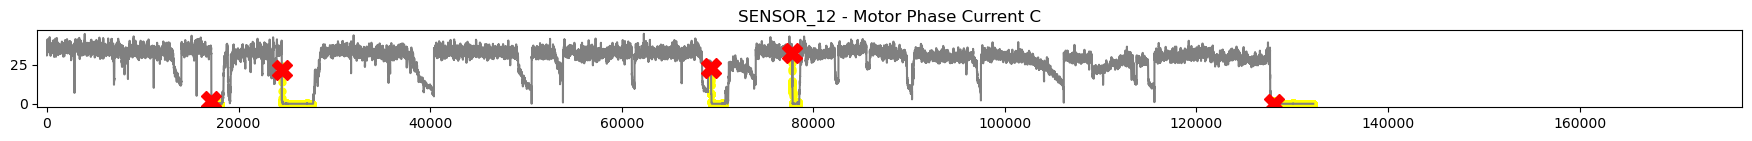

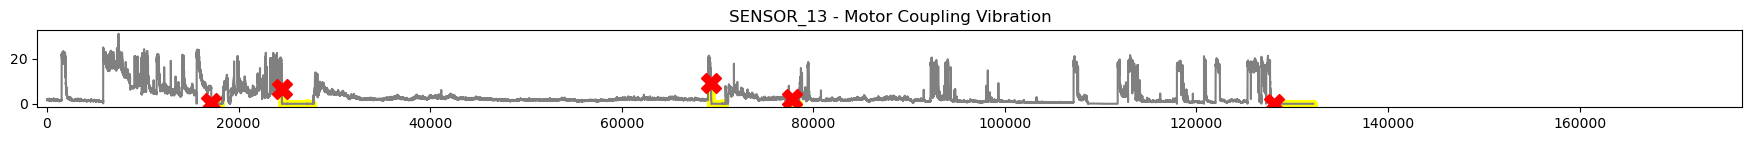

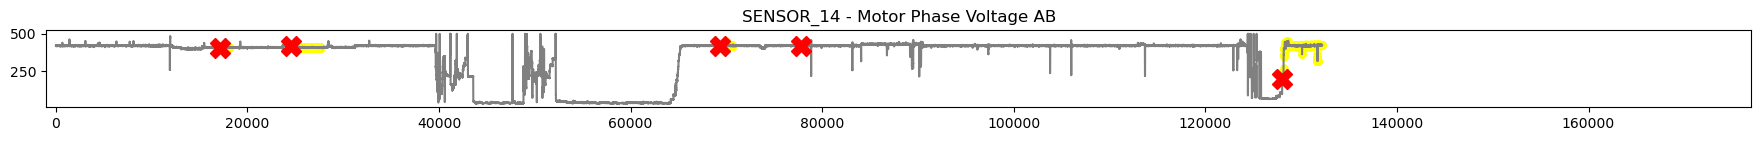

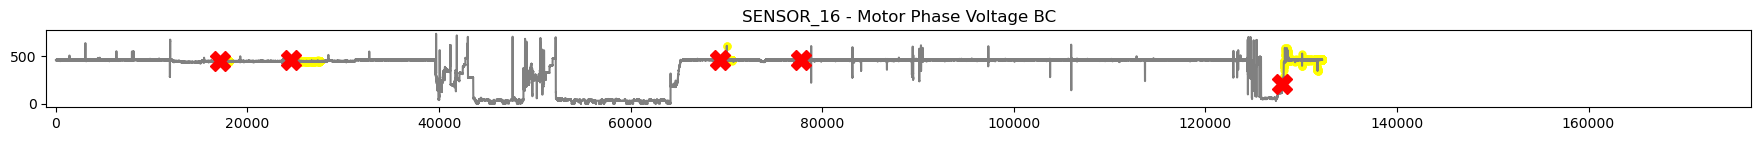

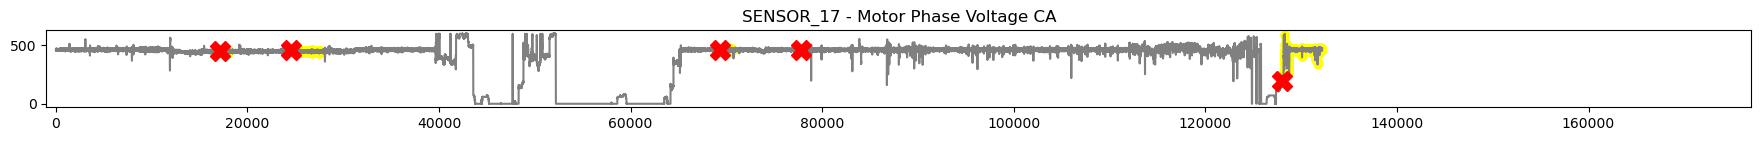

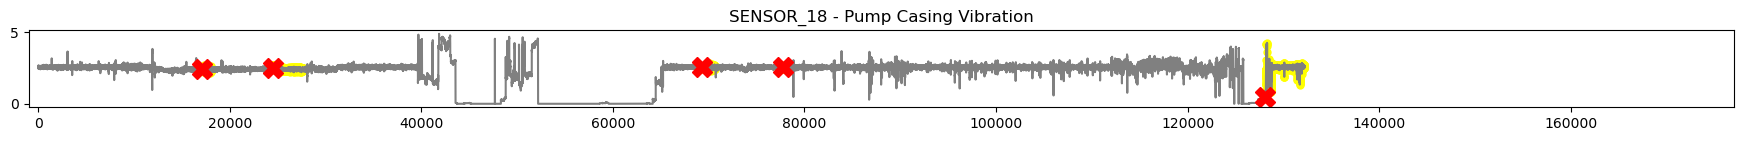

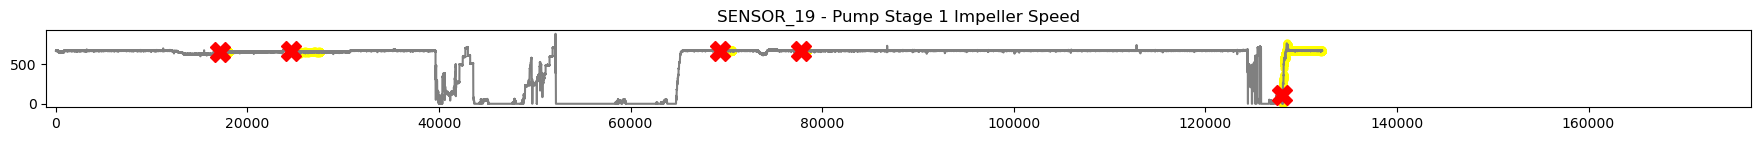

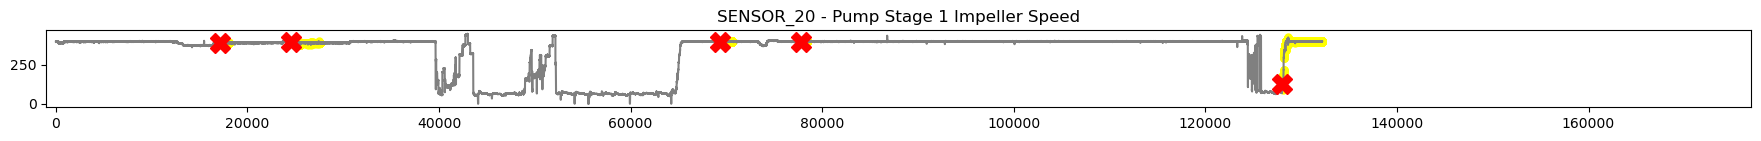

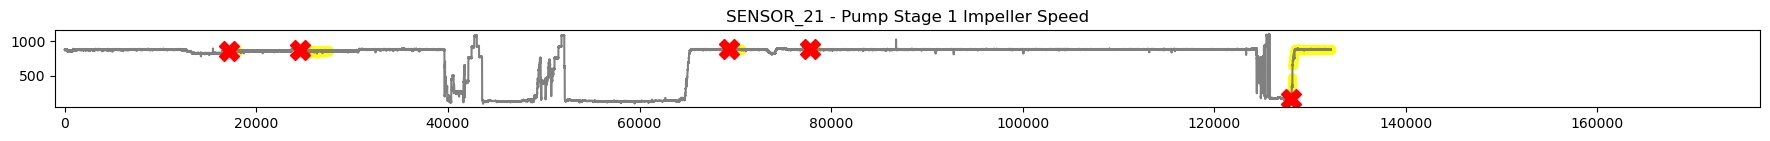

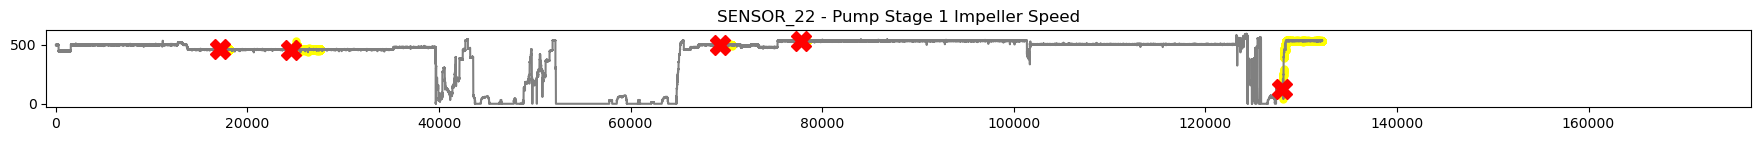

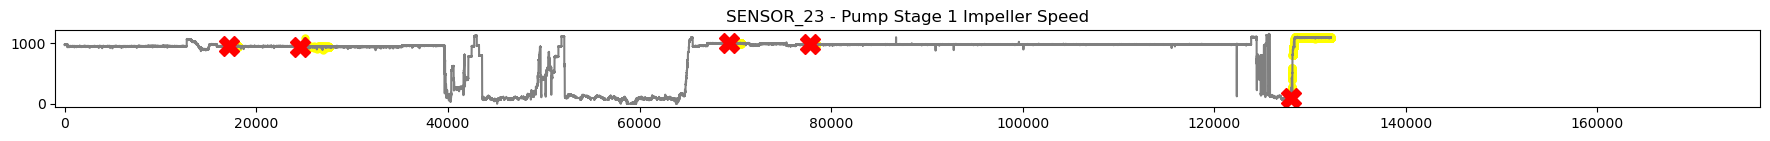

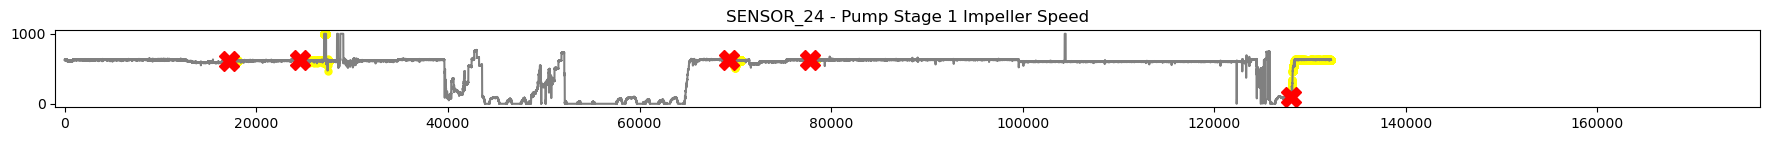

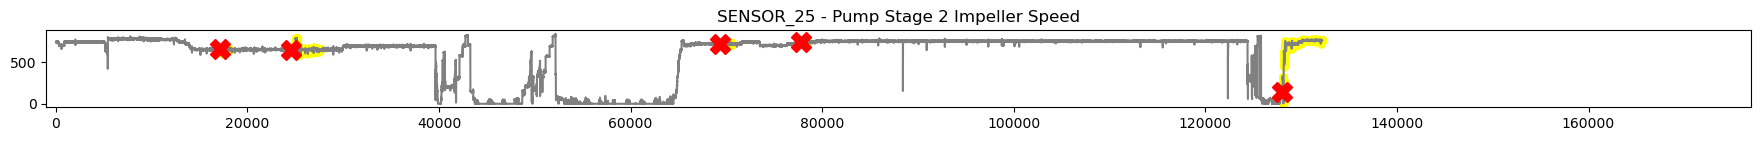

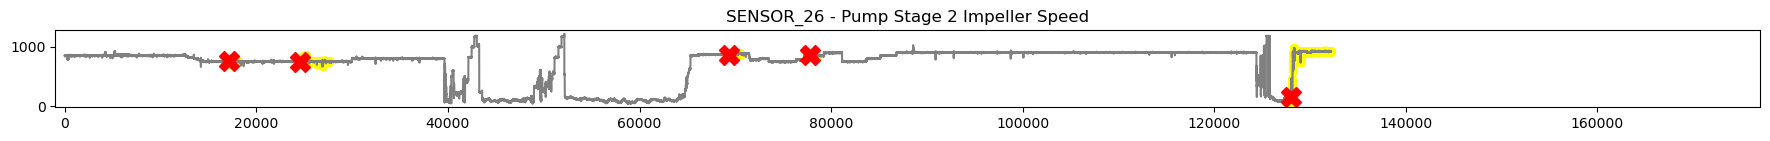

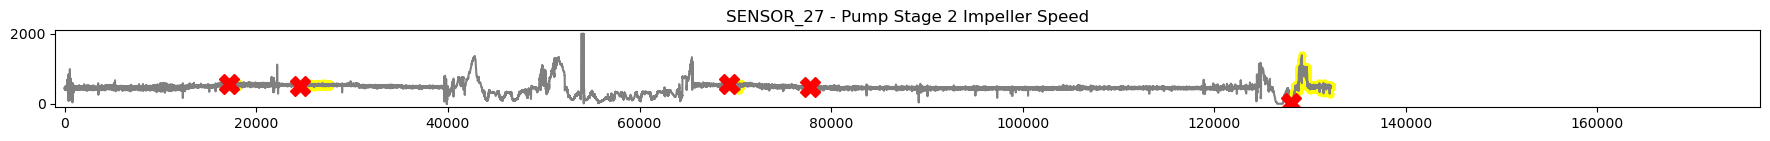

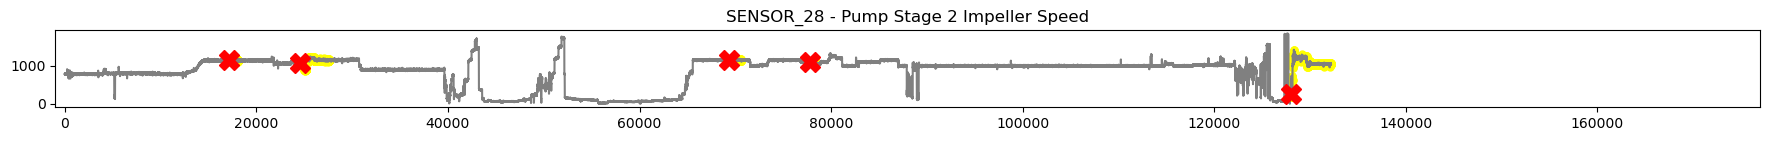

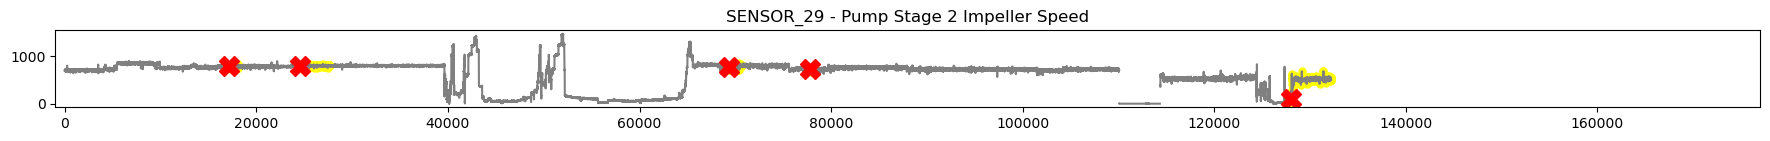

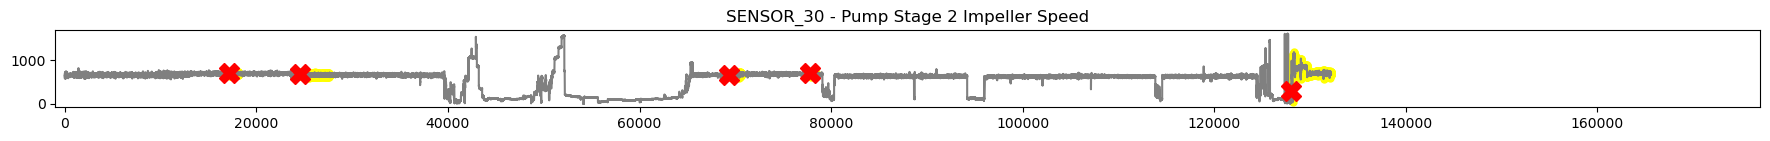

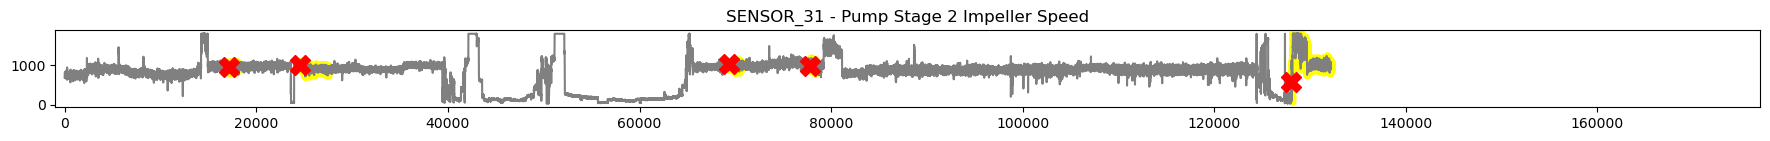

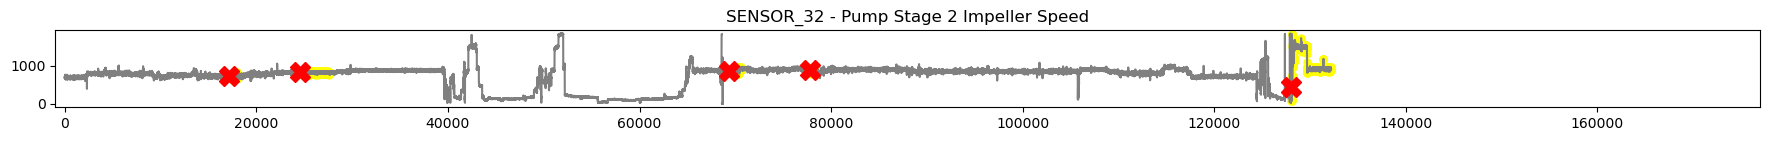

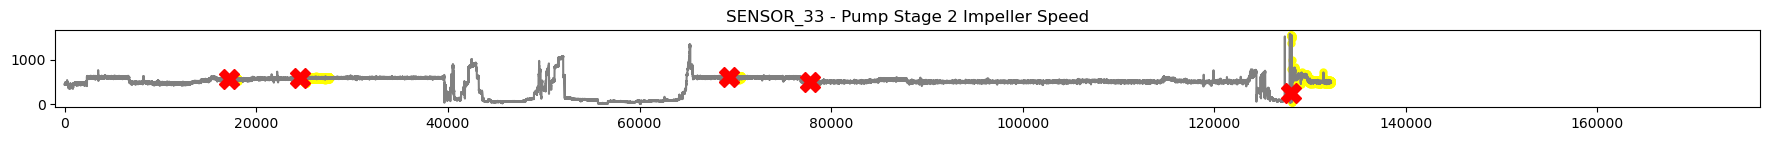

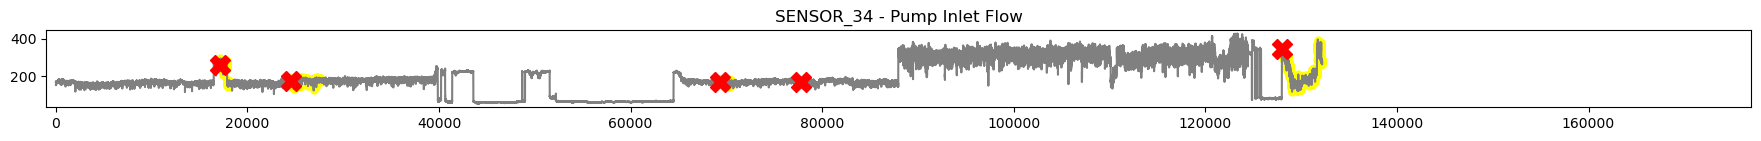

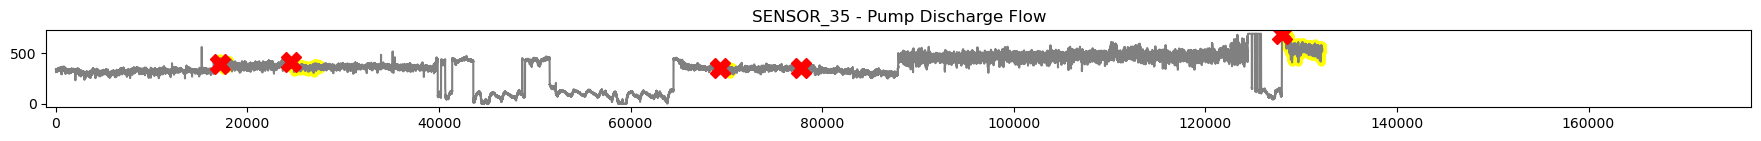

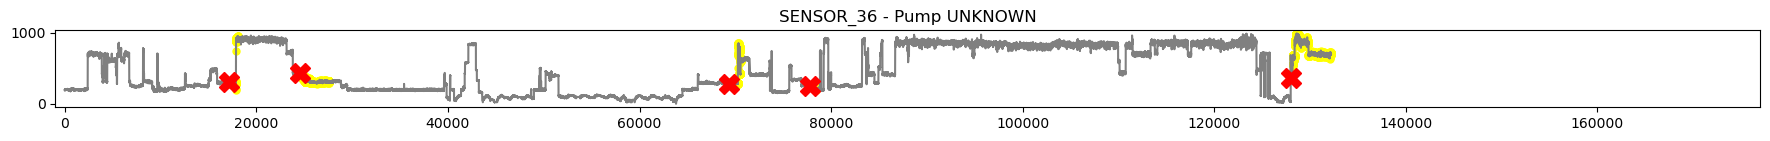

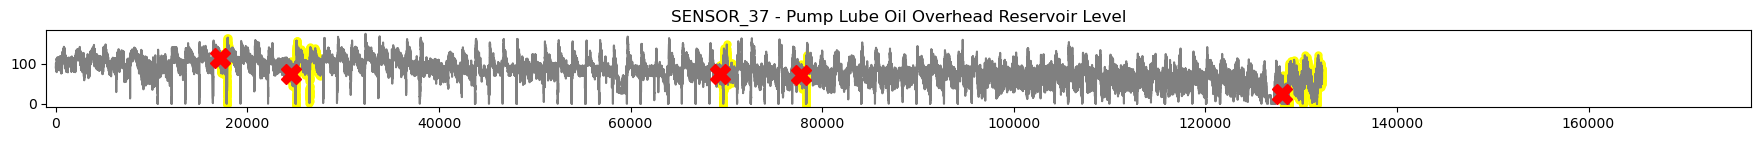

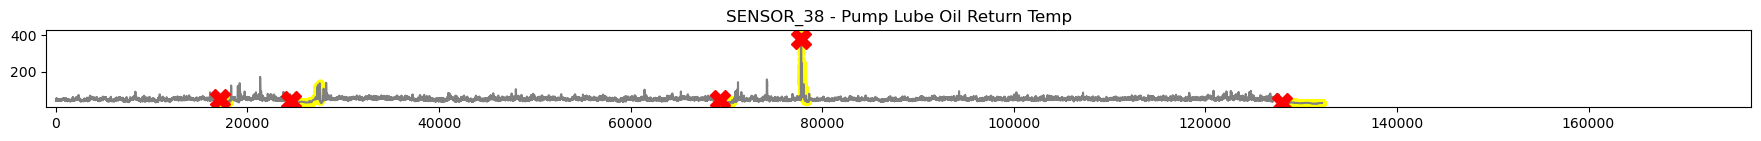

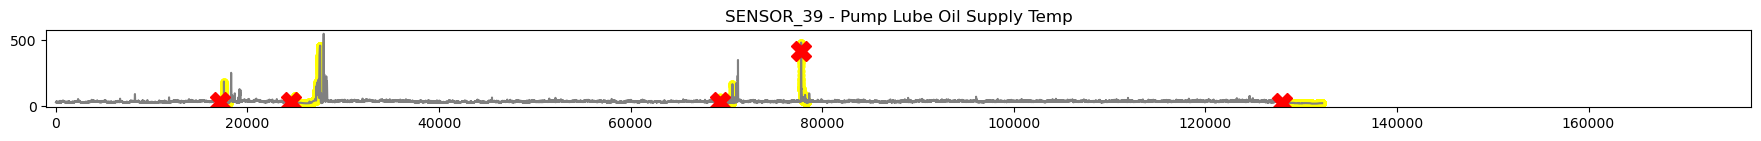

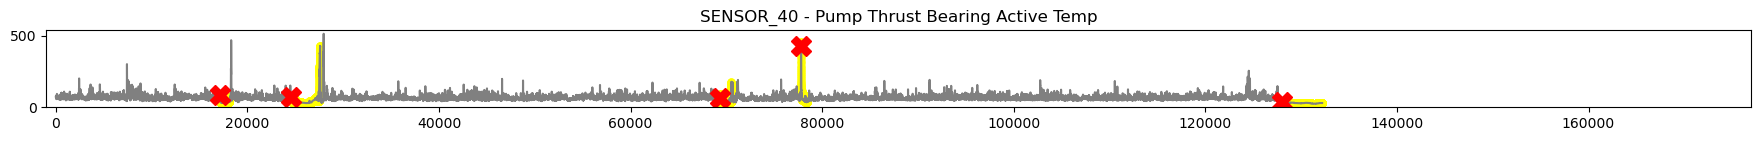

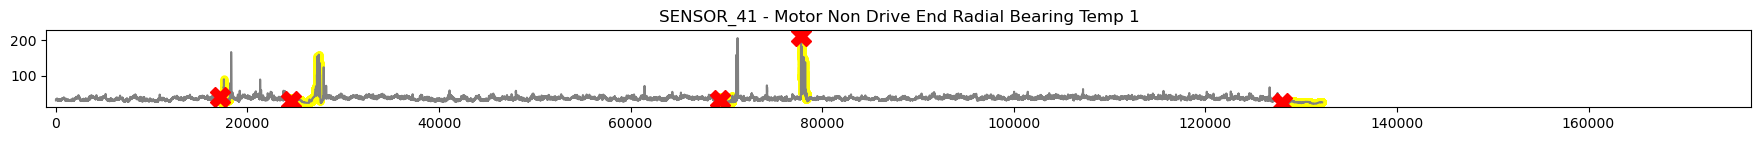

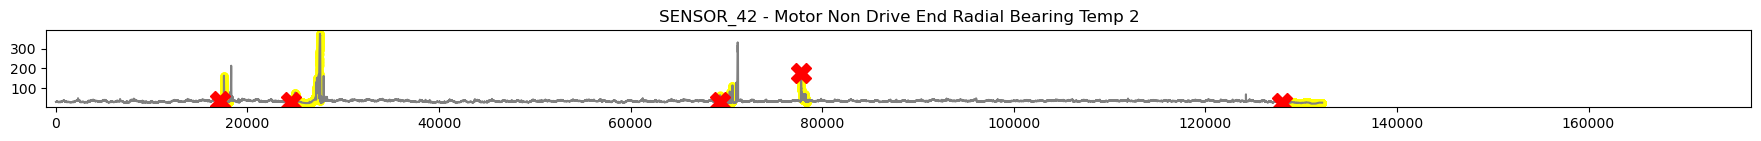

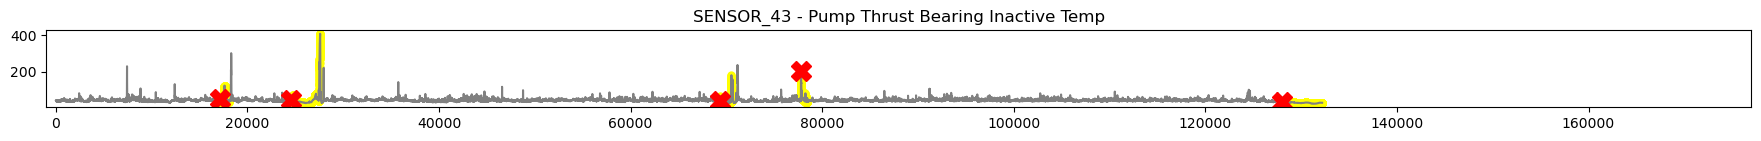

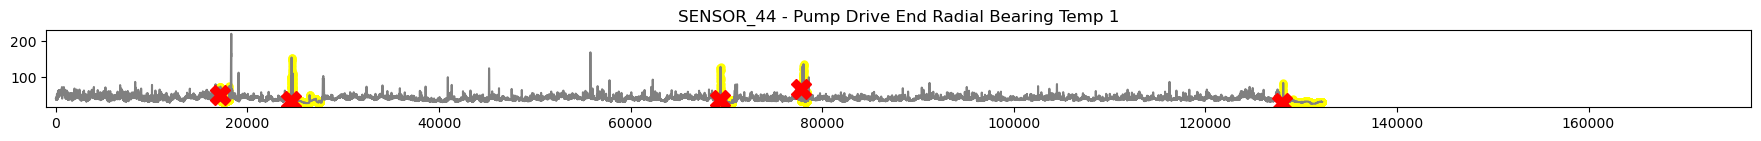

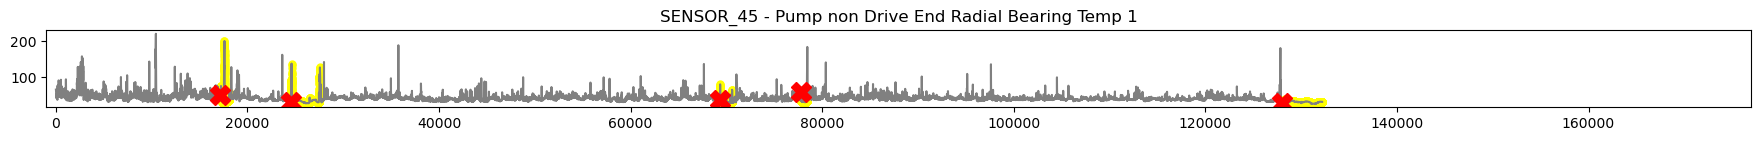

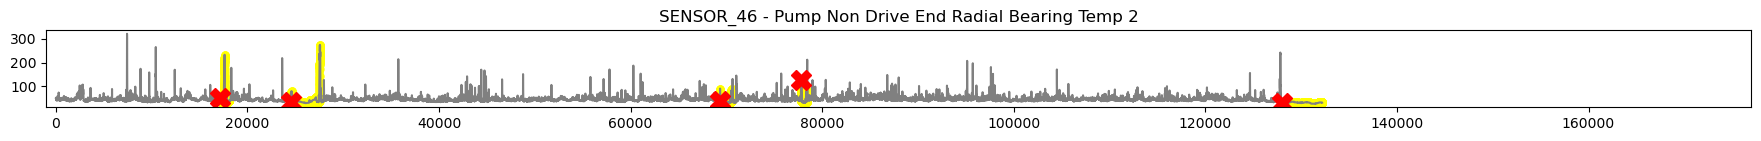

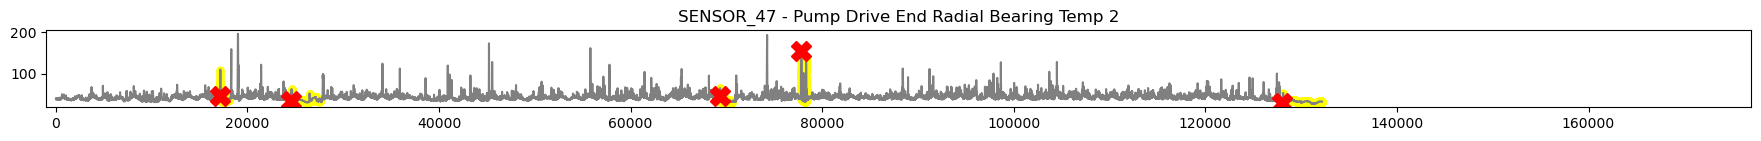

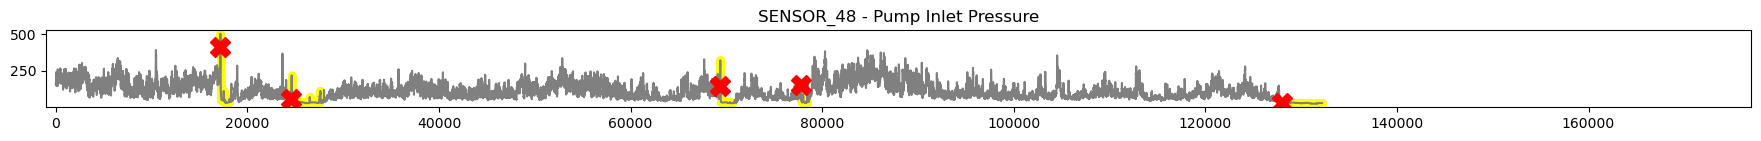

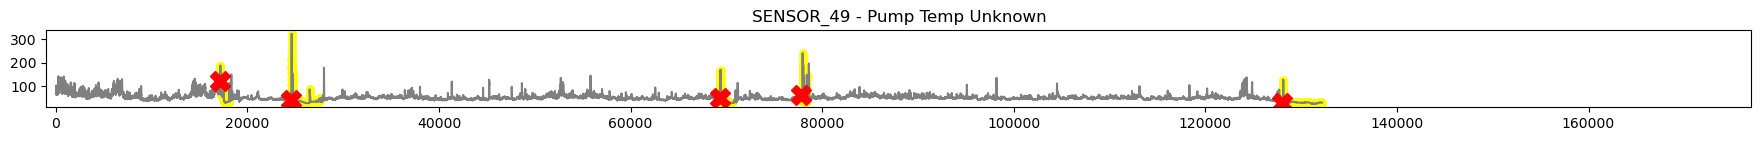

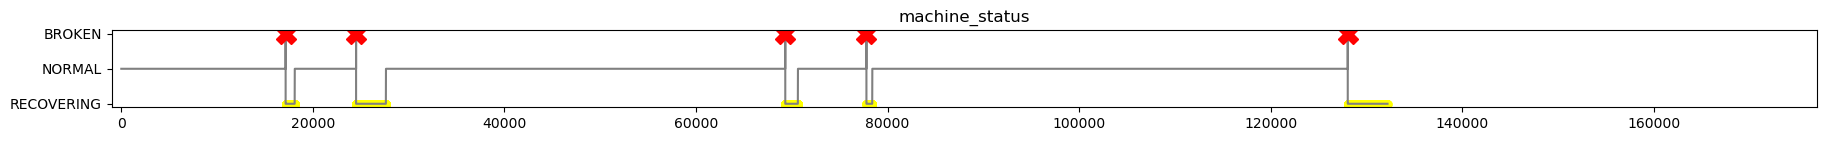

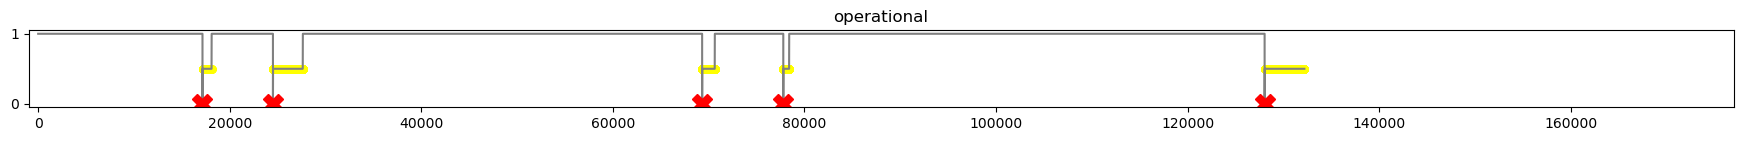

In [91]:
# Linegraphs with attributes/features highlights
for sensor in sensor_cols:
    plot = plt.figure(figsize=(22,1))
    plot = plt.plot(recovery_rows[sensor], linestyle = 'none', marker='o', color='yellow', markersize=5)
    plot = plt.plot(train[sensor], color='grey')
    plot = plt.plot(broken_rows[sensor], linestyle='none', marker='X', color='red',markersize=14)
    plot = plt.title(sensor)
    plt.xlim((-1000, 177000))

## Preprocessing 

### Initial Pre-Processing steps

In [112]:
# split data into X and y (data and labels)         
X_cols = train.iloc[ : , 1:-2].columns

X_train = train.iloc[:,1:-2].copy()
y_train = train['machine_status']



In [114]:
# Forward fill all NA values
X_train = X_train.fillna(method='ffill')
X_train.describe()

SENSOR_01 - Motor Frequency A  SENSOR_02 - Motor Frequency B  \
count                  132192.000000                  132192.000000   
mean                       47.681367                      51.087234   
std                         2.884607                       3.444173   
min                        22.439240                      36.545140   
25%                        46.744790                      50.390621   
50%                        48.046880                      51.822910   
75%                        49.262150                      53.038190   
max                        55.772570                      56.032990   

       SENSOR_03 - Motor Frequency C  SENSOR_04 - Motor Speed  \
count                  132192.000000            132192.000000   
mean                       43.312336               583.886305   
std                         2.332091               149.954459   
min                        33.289930                 2.798032   
25%                        42.274303               624.768500   
50%                        43.576385               631.365700   
75%                        44.791664               636.574100   
max                        48.220490               800.000000   

       SENSOR_05 - Motor Current  SENSOR_06 - Motor Active Power  \
count              132192.000000                   132192.000000   
mean                   74.384402                       12.775648   
std                    19.196125                        2.680799   
min                     0.000000                        0.014468   
25%                    72.723895                       13.201680   
50%                    77.527360                       13.411460   
75%                    82.184810                       13.614000   
max                    99.999880                       22.251160   

       SENSOR_07 - Motor Apparent Power  SENSOR_08 - Motor Reactive Power  \
count                     132192.000000                     132192.000000   
mean                          15.346671                         14.748941   
std                            2.974476                          2.714585   
min                            0.000000                          0.028935   
25%                           15.668400                         15.118630   
50%                           16.124130                         15.263310   
75%                           16.203700                         15.545430   
max                           23.509840                         23.307290   

       SENSOR_09 - Motor Shaft Power    SENSOR_10 - Motor Phase Current A  \
count                    132192.000000                      132192.000000   
mean                         14.428174                          40.200225   
std                           2.778930                          12.633068   
min                           0.000000                           0.000000   
25%                          14.858220                          39.546800   
50%                          15.082470                          43.102065   
75%                          15.118630                          46.744405   
max                          22.294560                          76.106860   

       ...  SENSOR_40 - Pump Thrust Bearing Active Temp  \
count  ...                                132192.000000   
mean   ...                                    64.107414   
std    ...                                    20.646110   
min    ...                                    23.437500   
25%    ...                                    55.208330   
50%    ...                                    62.239580   
75%    ...                                    70.572910   
max    ...                                   512.760400   

       SENSOR_41 - Motor Non Drive End Radial Bearing Temp 1  \
count                                      132192.000000       
mean                                           36.097885       
std                                             8.799788

In [117]:
# normalize data 
normalize = Normalizer()
X_train = normalize.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_train.columns = X_cols

### Create the Principal Component Analysis

In [116]:
pca = PCA(n_components = .99, svd_solver = 'full', random_state = RANDNUM )
pca.fit(X_train)
print(f'Number of components after reduction: {pca.n_components_}')

Number of components after reduction: 16


In [118]:
pca.explained_variance_

array([0.09629125, 0.00890455, 0.00644001, 0.0038204 , 0.00263758,
       0.00227281, 0.00158987, 0.00131147, 0.00112446, 0.00102644,
       0.00093835, 0.00073091, 0.00055499, 0.00045077, 0.00043499,
       0.00026746])

In [119]:
pca.explained_variance_ratio_

array([0.74086909, 0.06851203, 0.04954972, 0.0293943 , 0.02029362,
       0.01748711, 0.01223256, 0.01009048, 0.00865167, 0.0078975 ,
       0.00721968, 0.00562366, 0.0042701 , 0.00346824, 0.00334683,
       0.00205787])

In [120]:
"""
This snippet to produce this readout was taken from dizzycoding.com
"""
n_comps = pca.n_components_
most_important_comps = [np.abs(pca.components_[i]).argmax() for i in range(n_comps)]
intital_features = list(X_train.columns)
most_important_sensors = [intital_features[most_important_comps[i]] for i in range(n_comps)]
dic = {'PC{}'.format(i+1): most_important_sensors[i] for i in range(n_comps)}
df1 = pd.DataFrame(sorted(dic.items()))
print("Most Important Features") 
df1

Most Important Features


0                                        1
0    PC1                  SENSOR_04 - Motor Speed
1   PC10  SENSOR_32 - Pump Stage 2 Impeller Speed
2   PC11  SENSOR_32 - Pump Stage 2 Impeller Speed
3   PC12          SENSOR_48 - Pump Inlet Pressure
4   PC13  SENSOR_33 - Pump Stage 2 Impeller Speed
5   PC14          SENSOR_48 - Pump Inlet Pressure
6   PC15  SENSOR_23 - Pump Stage 1 Impeller Speed
7   PC16       SENSOR_16 - Motor Phase Voltage BC
8    PC2                 SENSOR_36 - Pump UNKNOWN
9    PC3  SENSOR_27 - Pump Stage 2 Impeller Speed
10   PC4  SENSOR_27 - Pump Stage 2 Impeller Speed
11   PC5  SENSOR_29 - Pump Stage 2 Impeller Speed
12   PC6       SENSOR_17 - Motor Phase Voltage CA
13   PC7  SENSOR_28 - Pump Stage 2 Impeller Speed
14   PC8          SENSOR_35 - Pump Discharge Flow
15   PC9  SENSOR_30 - Pump Stage 2 Impeller Speed

In [99]:
# Transform the data using the trained PCA model to reduce dimensionality 
reduced_x_train = pca.transform(X_train)

### Visualizations 

#### Plot the PCA's determined important sensors

array([<AxesSubplot:title={'center':'SENSOR_04 - Motor Speed'}>,
       <AxesSubplot:title={'center':'SENSOR_36 - Pump UNKNOWN'}>,
       <AxesSubplot:title={'center':'SENSOR_27 - Pump Stage 2 Impeller Speed'}>,
       <AxesSubplot:title={'center':'SENSOR_27 - Pump Stage 2 Impeller Speed'}>,
       <AxesSubplot:title={'center':'SENSOR_29 - Pump Stage 2 Impeller Speed'}>,
       <AxesSubplot:title={'center':'SENSOR_17 - Motor Phase Voltage CA'}>,
       <AxesSubplot:title={'center':'SENSOR_28 - Pump Stage 2 Impeller Speed'}>,
       <AxesSubplot:title={'center':'SENSOR_35 - Pump Discharge Flow'}>,
       <AxesSubplot:title={'center':'SENSOR_30 - Pump Stage 2 Impeller Speed'}>,
       <AxesSubplot:title={'center':'SENSOR_32 - Pump Stage 2 Impeller Speed'}>,
       <AxesSubplot:title={'center':'SENSOR_32 - Pump Stage 2 Impeller Speed'}>,
       <AxesSubplot:title={'center':'SENSOR_48 - Pump Inlet Pressure'}>,
       <AxesSubplot:title={'center':'SENSOR_33 - Pump Stage 2 Impeller Speed'}>,

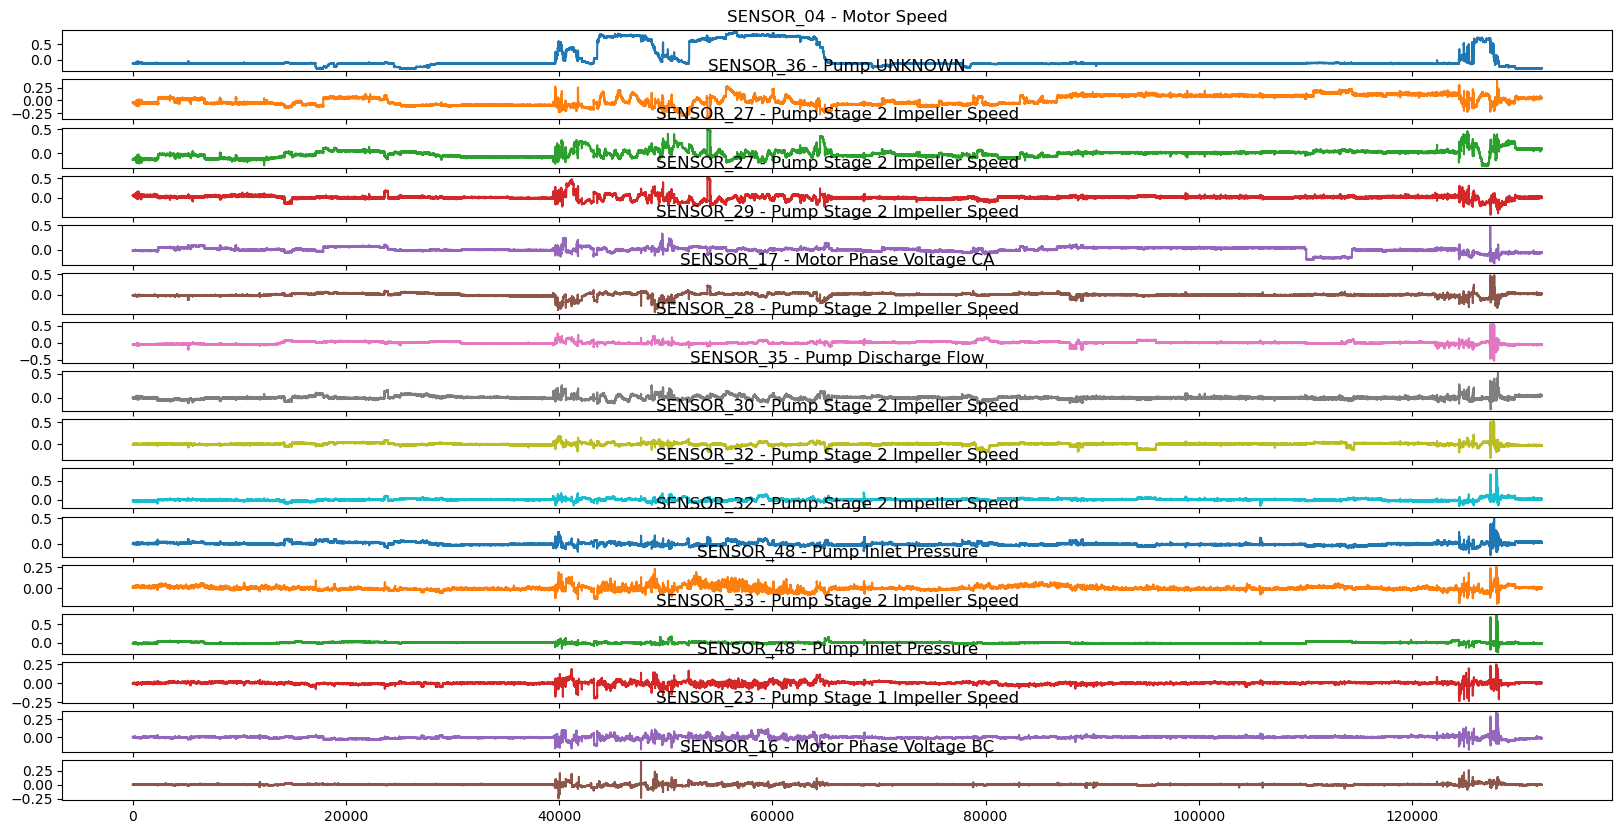

In [100]:
# Plots of the PCA determined most important sensors
pd.DataFrame(reduced_x_train).plot(subplots = True,sharex=True, figsize=(20,10), title=most_important_sensors, legend=False)

#### Generate Heatmaps using the PCA

Text(0.5, 1.0, 'Correlation Heatmap of Imporant Sensors determined by the PCA')

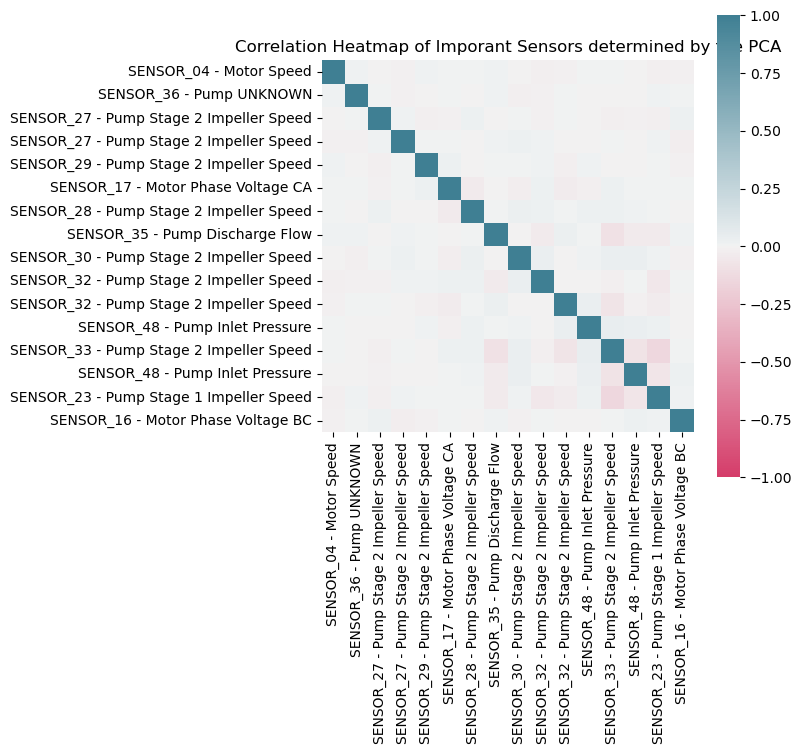

In [101]:
plt.figure(figsize=(6,6))

cmap = sns.diverging_palette(360, 220, as_cmap=True)
sns.heatmap((pd.DataFrame(reduced_x_train).sample(n=10000, replace=True, random_state=RANDNUM)).corr(), square=True, cmap=cmap, vmin = -1, vmax=1, yticklabels= most_important_sensors, xticklabels= most_important_sensors)
plt.title('Correlation Heatmap of Imporant Sensors determined by the PCA')

#### Covariance Matrix

In [111]:
cov = pd.DataFrame(reduced_x_train, columns=most_important_sensors).sample(n=10000, replace=True).cov()
cov




SENSOR_04 - Motor Speed  \
SENSOR_04 - Motor Speed                                 0.095712   
SENSOR_36 - Pump UNKNOWN                               -0.000528   
SENSOR_27 - Pump Stage 2 Impeller Speed                 0.000499   
SENSOR_27 - Pump Stage 2 Impeller Speed                 0.000107   
SENSOR_29 - Pump Stage 2 Impeller Speed                 0.000112   
SENSOR_17 - Motor Phase Voltage CA                      0.000139   
SENSOR_28 - Pump Stage 2 Impeller Speed                 0.000085   
SENSOR_35 - Pump Discharge Flow                        -0.000126   
SENSOR_30 - Pump Stage 2 Impeller Speed                 0.000112   
SENSOR_32 - Pump Stage 2 Impeller Speed                -0.000131   
SENSOR_32 - Pump Stage 2 Impeller Speed                -0.000155   
SENSOR_48 - Pump Inlet Pressure                        -0.000162   
SENSOR_33 - Pump Stage 2 Impeller Speed                 0.000014   
SENSOR_48 - Pump Inlet Pressure                         0.000095   
SENSOR_23 - Pump Stage 1 Impeller Speed                -0.000059   
SENSOR_16 - Motor Phase Voltage BC                     -0.000044   

                                         SENSOR_36 - Pump UNKNOWN  \
SENSOR_04 - Motor Speed                             -5.280234e-04   
SENSOR_36 - Pump UNKNOWN                             9.054043e-03   
SENSOR_27 - Pump Stage 2 Impeller Speed              2.103219e-05   
SENSOR_27 - Pump Stage 2 Impeller Speed              1.563217e-04   
SENSOR_29 - Pump Stage 2 Impeller Speed             -1.209144e-04   
SENSOR_17 - Motor Phase Voltage CA                   2.840386e-05   
SENSOR_28 - Pump Stage 2 Impeller Speed              1.301943e-05   
SENSOR_35 - Pump Discharge Flow                      2.682943e-05   
SENSOR_30 - Pump Stage 2 Impeller Speed             -5.859404e-05   
SENSOR_32 - Pump Stage 2 Impeller Speed              3.368553e-07   
SENSOR_32 - Pump Stage 2 Impeller Speed             -4.543533e-05   
SENSOR_48 - Pump Inlet Pressure                      8.956383e-07   
SENSOR_33 - Pump Stage 2 Impeller Speed              5.079729e-06   
SENSOR_48 - Pump Inlet Pressure                     -1.040103e-05   
SENSOR_23 - Pump Stage 1 Impeller Speed             -2.002180e-05   
SENSOR_16 - Motor Phase Voltage BC                   1.828118e-05   

                                         SENSOR_27 - Pump Stage 2 Impeller Speed  \
SENSOR_04 - Motor Speed                                             4.994197e-04   
SENSOR_36 - Pump UNKNOWN                                            2.103219e-05   
SENSOR_27 - Pump Stage 2 Impeller Speed                             6.339041e-03   
SENSOR_27 - Pump Stage 2 Impeller Speed                            -1.313798e-04   
SENSOR_29 - Pump Stage 2 Impeller Speed                            -3.703578e-05   
SENSOR_17 - Motor Phase Voltage CA                                 -6.239740e-05   
SENSOR_28 - Pump Stage 2 Impeller Speed                             4.419848e-05   
SENSOR_35 - Pump Discharge Flow                                    -4.538072e-05   
SENSOR_30 - Pump Stage 2 Impeller Speed                             3.617685e-05   
SENSOR_32 - Pump Stage 2 Impeller Speed                             3.515160e-05   
SENSOR_32 - Pump Stage 2 Impeller Speed                             3.132439e-05   
SENSOR_48 - Pump Inlet Pressure                                     3.473802e-05   
SENSOR_33 - Pump Stage 2 Impeller Speed                             1.113556e-05   
SENSOR_48 - Pump Inlet Pressure                                     4.894077e-06   
SENSOR_23 - Pump Stage 1 Impeller Speed                            -6.394744e-07   
SENSOR_16 - Motor Phase Voltage BC                                 -2.579134e-05   

                                         SENSOR_27 - Pump Stage 2 Impeller Speed  \
SENSOR_04 - Motor Speed                                                 0.000107   
SENSOR_36 - Pump UNKNOWN                                                0.000156   
SENSOR_27 - Pump Stage 2 Impe

## Modeling

In [103]:
# Generate a labeler for unservised learning 
def label_permute_compare(y,ypred, n=3):
    """A helper function to find the best label - number combo """
    results = pd.DataFrame(y)
    perms = list(itertools.permutations([0, 1, 2]))      #create permutation list
    best_labels = []
    best_acc = 0 
    current = {}
    labels = ['NORMAL', 'BROKEN', 'RECOVERING']
    for perm in perms:
        for i in range(n):
            current[labels[i]] = perm[i]
            if len(current) == 3:
                conditions = [
                    (y['machine_status'] == current['NORMAL']),
                    (y['machine_status'] == current['BROKEN']),
                    (y['machine_status'] == current['RECOVERING'])]
                results['test'] = results['machine_status'].map(current)
                current_accuracy = accuracy_score(results['test'], ypred)
                if current_accuracy > best_acc: 
                    best_acc = current_accuracy
                    best_labels = perm
                    results['best'] = results['test']
    return best_labels, best_acc

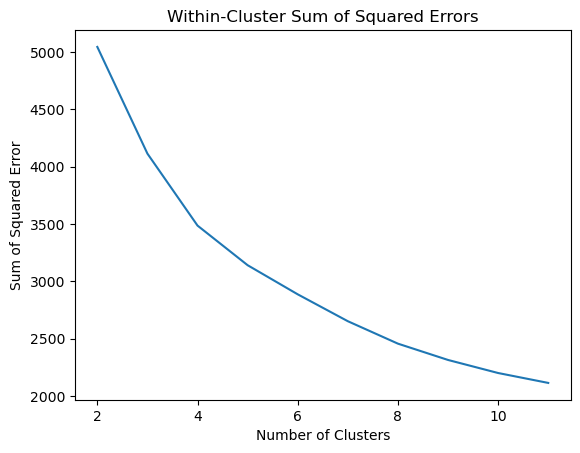

In [104]:
# Collect and Visualize error clusters
error = []
K = range(2,12)
for k in K:
    kmeans= KMeans(n_clusters=k, max_iter=500, init='k-means++', n_init=20, random_state=RANDNUM)
    kmeans_fit = kmeans.fit(reduced_x_train)
    error.append(kmeans.inertia_)
    
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error')
plt.title('Within-Cluster Sum of Squared Errors')
plt.plot(K,error)